In [2]:
import catan
from catan.games import tiles
from catan import Tile
import pandas as pd

pd.options.display.precision = 2
%matplotlib inline

In [6]:
tiles = [
    Tile(2, 0, 'wheat', 10),
    Tile(4, 0, 'sheep', 8),
    Tile(6, 0, 'desert'),
    Tile(1, 1, 'rock', 9),
    Tile(3, 1, 'clay', 5),
    Tile(5, 1, 'rock', 4),
    Tile(7, 1, 'wood', 3),
    Tile(0, 2, 'wood', 12),
    Tile(2, 2, 'wheat', 6),
    Tile(4, 2, 'sheep', 11),
    Tile(6, 2, 'clay', 9),
    Tile(8, 2, 'wheat', 6),
    Tile(1, 3, 'sheep', 11),
    Tile(3, 3, 'wood', 3),
    Tile(5, 3, 'rock', 10),
    Tile(7, 3, 'wood', 2),
    Tile(2, 4, 'clay', 4),
    Tile(4, 4, 'wheat', 8),
    Tile(6, 4, 'sheep', 5)]

In [7]:
brd = catan.Board(tiles)

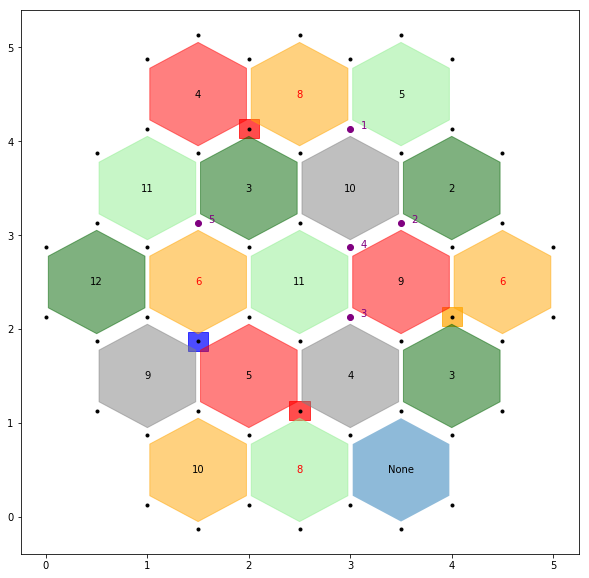

In [22]:
brd.plot()
brd.plot_best('pipworth')

In [19]:
# brd.settle(3,2,'blue')
# brd.settle(8,2,'orange')
brd.settle(5,1,'red')
brd.settle(4,4,'red')

In [20]:
brd.best('pipworth', player='orange').head()

pips  relpips  pipworth  ave_potential  blocking  total  \
x y                                                            
6 4    12    10.40      7.80           7.38      6.65  44.23   
7 3     8     9.63      7.22           6.85      6.95  38.65   
6 3     9     9.30      6.98           7.83      6.97  40.08   
  2     9     9.30      6.98           7.97      7.54  40.79   
3 3     9     9.18      6.88           6.93      6.26  38.26   

                       tiles  
x y                           
6 4  sheep 5 wheat 8 rock 10  
7 3    wood 2 rock 10 clay 9  
6 3  rock 10 clay 9 sheep 11  
  2   clay 9 sheep 11 rock 4  
3 3  wood 3 sheep 11 wheat 6

In [21]:
brd.best_pair('pipworth', 'orange').head()

pipworth
x1 y1 x2 y2          
6  4  7  3      12.61
7  3  6  4      12.42
6  3  6  4      12.18
   2  6  4      12.18
3  3  6  4      12.08

In [4]:
brd.settle(5, 1, 'red')
pair = brd.best_pair('pipworth', 'blue')
pair.head()

pipworth
x1 y1 x2 y2          
3  4  7  1      22.41
7  1  3  4      22.40
   2  3  4      21.01
   3  3  4      20.40
8  3  3  4      20.08

In [5]:
pair = brd.best_pair('pipworth', 'blue')
pair.head()

pipworth
x1 y1 x2 y2          
3  4  7  1      22.41
7  1  3  4      22.40
   2  3  4      21.01
   3  3  4      20.40
8  3  3  4      20.08

In [6]:
brd.best('pipworth').head()

pips  relpips  pipworth  ave_potential  blocking  total  \
x y                                                            
3 4    12    12.83     12.83           8.77      9.73  56.16   
7 1    12    12.78     12.78          10.97     10.80  59.33   
  2    12    11.39     11.39          10.50     10.49  55.77   
  3    12    10.78     10.78           9.38      6.03  48.97   
8 3    10    10.46     10.46           8.80      9.15  48.87   

                      tiles  
x y                          
3 4  wheat 5 clay 10 wood 8  
7 1  wood 8 clay 5 wheat 10  
  2   sheep 4 wood 8 clay 5  
  3   rock 6 wood 9 sheep 4  
8 3   rock 6 clay 3 sheep 4

In [7]:
brd.best('pipworth', 'blue').head()

pips  relpips  pipworth  ave_potential  blocking  total  \
x y                                                            
3 4    12    12.83     12.83           8.77      9.73  56.16   
7 1    12    12.78     12.78          10.97     10.80  59.33   
  2    12    11.39     11.39          10.50     10.49  55.77   
  3    12    10.78     10.78           9.38      6.03  48.97   
8 3    10    10.46     10.46           8.80      9.15  48.87   

                      tiles  
x y                          
3 4  wheat 5 clay 10 wood 8  
7 1  wood 8 clay 5 wheat 10  
  2   sheep 4 wood 8 clay 5  
  3   rock 6 wood 9 sheep 4  
8 3   rock 6 clay 3 sheep 4

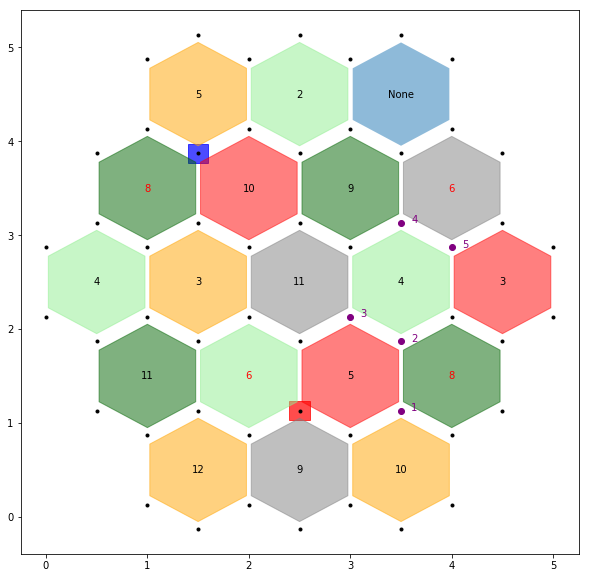

In [8]:
brd.settle(3,4,'blue')
brd.plot()
brd.plot_best()

In [9]:
brd.best().head()

pips  relpips  pipworth  ave_potential  blocking  total  \
x y                                                            
7 1    12    12.78     12.78          10.97     10.80  59.33   
  2    12    11.39     11.39          10.50     10.49  55.77   
  3    12    10.78     10.78           9.38      6.03  48.97   
8 3    10    10.46     10.46           8.80      9.15  48.87   
6 2     9     9.87      9.87          11.43     10.21  50.38   

                      tiles  
x y                          
7 1  wood 8 clay 5 wheat 10  
  2   sheep 4 wood 8 clay 5  
  3   rock 6 wood 9 sheep 4  
8 3   rock 6 clay 3 sheep 4  
6 2  sheep 4 rock 11 clay 5

**pipworth**: sum of pips surrounding hex, relative to how many pips of that resource on the board. minor bump-up for rock and bump-down for sheep  
**ave_potential**:  best expansion opportunities, using the pipworth metric (not considering others might block these). this should maybe be considered as a pair- eg. the expansion should go well with vertices I currently have.  
**blocking**: by placing here, I'm blocking other people's placements. this should maybe be considered as blocking other's pairs- eg. a player really needs rock, so this is a good block

ABCCBA

so, the last placement A2 needs only to consider earlier placement and blocking opportunities.  
B2 needs to consider that A will take the best remaining spot for its pair.  
C1 and C2 may be picked knowing that B then A will take the next best remaining spot.  
B1 should be picked knowing C1 and C2 placements and thus what is available for B2.  
A1 should be picked knowing what B1, C1, C2 and B2 placements will be.  